**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

**The First Mode**

In [2]:
# Group 1
center1 = (1.5, 0)
r_min1 = 4
r_max1 = 9
n_points1 = 200

theta1 = np.random.uniform(0, 2*np.pi, n_points1)
r1 = np.random.uniform(r_min1, r_max1, n_points1)
x1 = center1[0] + r1 * np.cos(theta1)
y1 = center1[1] + r1 * np.sin(theta1)

# Group 2
center2 = (1.5, 0)
r_min2 = 0
r_max2 = 6
n_points2 = 200

theta2 = np.random.uniform(0, 2*np.pi, n_points2)
r2 = np.random.uniform(r_min2, r_max2, n_points2)
x2 = center2[0] + r2 * np.cos(theta2)
y2 = center2[1] + r2 * np.sin(theta2)

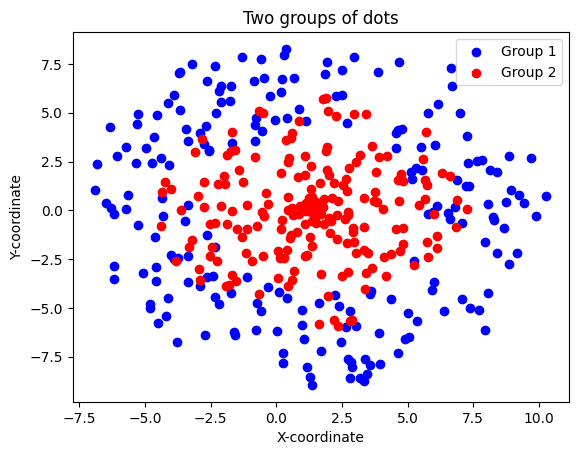

In [3]:
# Plot the data
plt.scatter(x1, y1, color='blue', label='Group 1')
plt.scatter(x2, y2, color='red', label='Group 2')
plt.legend()
plt.title('Two groups of dots')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

In [4]:
# Increase feature space to degree 2
X1 = np.column_stack((x1, y1, x1**2, x1*y1, y1**2))
X2 = np.column_stack((x2, y2, x2**2, x2*y2, y2**2))

In [5]:
# Concatenate data from both classes
num_samples = 200
X = np.vstack((X1, X2))
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples)))

In [6]:
# Add intercept term to feature matrix
X = np.column_stack((np.ones(2*num_samples), X))

In [7]:
# Define logistic regression with L2 regularization
def logistic_regression_l2(X, y, alpha, num_iterations):
    # Initialize weights
    w = np.zeros(X.shape[1])
    
    # Define sigmoid function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    # Define cost function with L2 regularization
    def cost_function(w, X, y, alpha):
        m = X.shape[0]
        z = X.dot(w)
        J = -1/m * (y.dot(np.log(sigmoid(z))) + (1-y).dot(np.log(1-sigmoid(z)))) + alpha/(2*m) * np.sum(w[1:]**2)
        return J
    
    # Define gradient function with L2 regularization
    def gradient(w, X, y, alpha):
        m = X.shape[0]
        z = X.dot(w)
        grad = 1/m * X.T.dot(sigmoid(z) - y) + alpha/m * np.concatenate(([0], w[1:]))
        return grad
    
    # Run gradient descent
    for i in range(num_iterations):
        J = cost_function(w, X, y, alpha)
        grad = gradient(w, X, y, alpha)
        w = w - 0.01 * grad
        
    return w

def sigmoid(z):
        return 1 / (1 + np.exp(-z))    

In [8]:
# Train logistic regression with L2 regularization
w = logistic_regression_l2(X, y, alpha=0.1, num_iterations=1000)

In [9]:
# Predict class labels for all data points
y_pred = sigmoid(X.dot(w)) >= 0.5

In [10]:
# Compute accuracy
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.8375


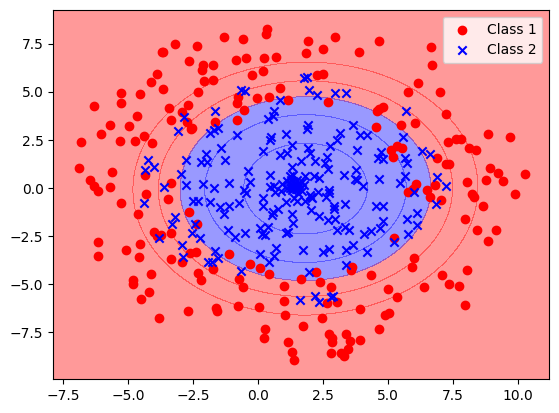

In [11]:
# Plot decision boundary
fig, ax = plt.subplots()
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.column_stack((np.ones(xx.ravel().shape), xx.ravel(), yy.ravel(),
                     (xx.ravel())**2, xx.ravel()*yy.ravel(), (yy.ravel())**2)).dot(w)
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
cmap = ListedColormap(['#FF0000', '#0000FF'])
ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
ax.scatter(x1, y1, c='r', marker='o', label='Class 1')
ax.scatter(x2, y2, c='b', marker='x', label='Class 2')
ax.legend()
plt.show()


**Define degree range to test : Mode 1**

**The Second Mode**

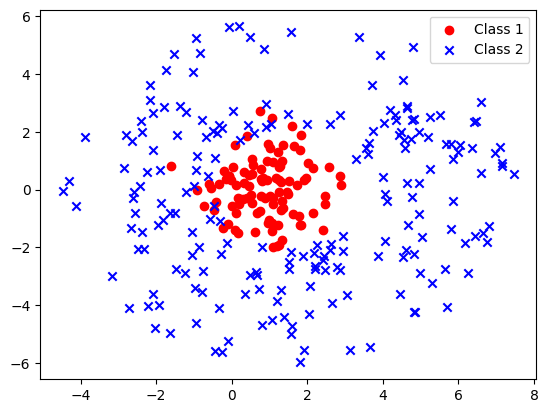

In [12]:
# Generate data for the first category
np.random.seed(42)
mean = [1, 0]
cov = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mean, cov, 100).T

# Generate data for the second category
theta = np.random.uniform(0, 2*np.pi, 200)
r = np.random.uniform(2, 6, 200)
x2 = r*np.cos(theta) + 1.5
y2 = r*np.sin(theta)

# Plot the data
fig, ax = plt.subplots()
ax.scatter(x1, y1, c='r', marker='o', label='Class 1')
ax.scatter(x2, y2, c='b', marker='x', label='Class 2')
ax.legend()
plt.show()

In [13]:
# Increase feature space to degree 2
X1 = np.column_stack((x1, y1, x1**2, x1*y1, y1**2))
X2 = np.column_stack((x2, y2, x2**2, x2*y2, y2**2))

In [14]:
# Concatenate data from both classes
X = np.vstack((X1, X2))
y = np.concatenate((np.zeros(100), np.ones(200)))

In [15]:
# Add intercept term to feature matrix
X = np.column_stack((np.ones(300), X))

In [16]:
# Train logistic regression with L2 regularization
w = logistic_regression_l2(X, y, alpha=0.1, num_iterations=1000)

In [17]:
# Predict class labels for all data points
y_pred = sigmoid(X.dot(w)) >= 0.5

In [18]:
# Compute accuracy
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.9433333333333334


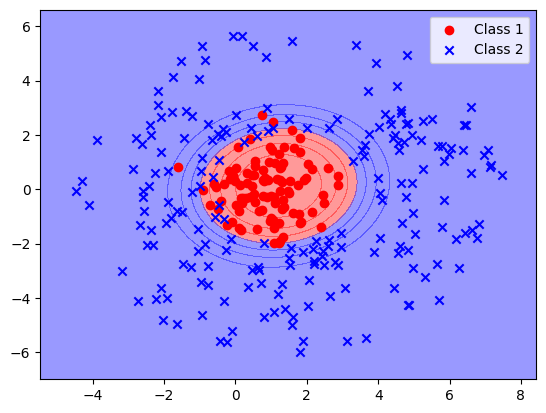

In [19]:
# Plot decision boundary
fig, ax = plt.subplots()
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.column_stack((np.ones(xx.ravel().shape), xx.ravel(), yy.ravel(),
                     (xx.ravel())**2, xx.ravel()*yy.ravel(), (yy.ravel())**2)).dot(w)
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
cmap = ListedColormap(['#FF0000', '#0000FF'])
ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
ax.scatter(x1, y1, c='r', marker='o', label='Class 1')
ax.scatter(x2, y2, c='b', marker='x', label='Class 2')
ax.legend()
plt.show()


**Find Best Degree**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best degree: 6


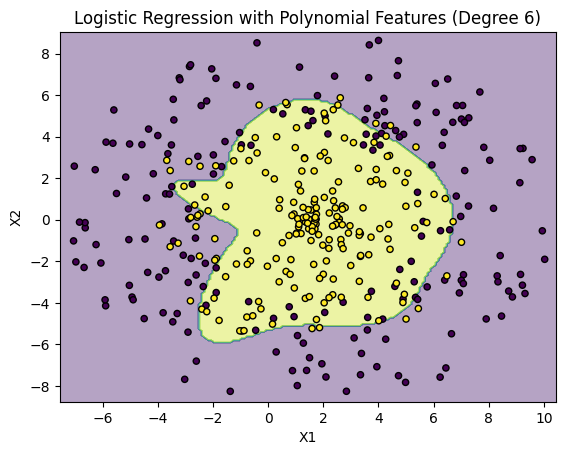

In [23]:
### mode 1 : 
center1 = (1.5, 0)
r_min1 = 4
r_max1 = 9
n_points1 = 200
theta1 = np.random.uniform(0, 2*np.pi, n_points1)
r1 = np.random.uniform(r_min1, r_max1, n_points1)
x1 = center1[0] + r1 * np.cos(theta1)
y1 = center1[1] + r1 * np.sin(theta1)
center2 = (1.5, 0)
r_min2 = 0
r_max2 = 6
n_points2 = 200
theta2 = np.random.uniform(0, 2*np.pi, n_points2)
r2 = np.random.uniform(r_min2, r_max2, n_points2)
x2 = center2[0] + r2 * np.cos(theta2)
y2 = center2[1] + r2 * np.sin(theta2)

# Combine data and labels
X = np.concatenate((np.concatenate((x1.reshape(-1,1), y1.reshape(-1,1)), axis=1), np.concatenate((x2.reshape(-1,1), y2.reshape(-1,1)), axis=1)), axis=0)
y = np.concatenate((np.zeros(len(x1)), np.ones(len(x2))))

# Fit logistic regression models with polynomial features of degree 1 to 10
acc = []
for deg in range(1, 11):
    model = make_pipeline(PolynomialFeatures(deg), LogisticRegression(penalty='l2'))
    model.fit(X, y)
    acc.append(model.score(X, y))

# Print best degree and accuracy
best_degree = np.argmax(acc) + 1
best_acc = np.max(acc)
print(f"Best degree: {best_degree}")

# Plot decision boundary of best model
model = make_pipeline(PolynomialFeatures(best_degree), LogisticRegression(penalty='l2'))
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title(f"Logistic Regression with Polynomial Features (Degree {best_degree})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best degree: 3
Best accuracy: 0.9666666666666667


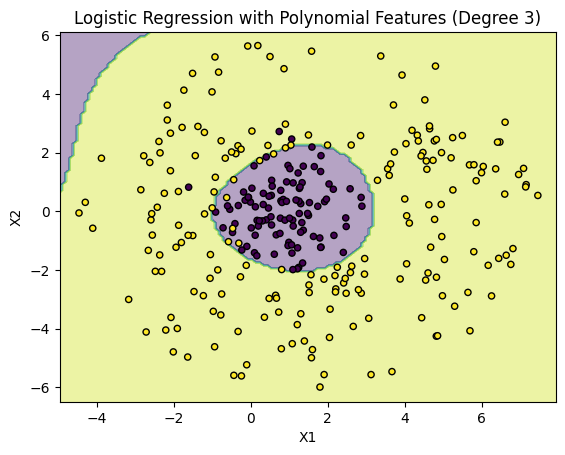

In [22]:
np.random.seed(42)
mean = [1, 0]
cov = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mean, cov, 100).T

# Generate data for the second category
theta = np.random.uniform(0, 2*np.pi, 200)
r = np.random.uniform(2, 6, 200)
x2 = r*np.cos(theta) + 1.5
y2 = r*np.sin(theta)

# Combine data and labels
X = np.concatenate((np.concatenate((x1.reshape(-1,1), y1.reshape(-1,1)), axis=1), np.concatenate((x2.reshape(-1,1), y2.reshape(-1,1)), axis=1)), axis=0)
y = np.concatenate((np.zeros(len(x1)), np.ones(len(x2))))

# Fit logistic regression models with polynomial features of degree 1 to 10
acc = []
for deg in range(1, 11):
    model = make_pipeline(PolynomialFeatures(deg), LogisticRegression(penalty='l2'))
    model.fit(X, y)
    acc.append(model.score(X, y))

# Print best degree and accuracy
best_degree = np.argmax(acc) + 1
best_acc = np.max(acc)
print(f"Best degree: {best_degree}")
print(f"Best accuracy: {best_acc}")

# Plot decision boundary of best model
model = make_pipeline(PolynomialFeatures(best_degree), LogisticRegression(penalty='l2'))
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title(f"Logistic Regression with Polynomial Features (Degree {best_degree})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
